In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.isnull().sum() # boş değer var mı? 

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df.dtypes # veri tipleri nelerdir?

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())

In [6]:
df.isnull().sum()

CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df = df.fillna(df.mean()) # Bütün boş alanları o alanın ortalaması ile doldurur
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.to_csv("HousingData_clean.csv")

In [45]:
!pip install scikit-learn

In [46]:
# Etiket ile diğer verileri ayır (bizim örneğimizdeki etiket fiyattır)

In [47]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [59]:
X = df.drop(columns = ["MEDV"])
y = df["MEDV"]
# Etiket ile diğer verileri ayır.

In [60]:
X.shape

(506, 13)

In [61]:
# Train -> Test 200 tane
# 306 eğitim
# 200 test 

# 306 tanesini inceler inceleme sonucu ne kadar başarılı olduğunu 200 üzerinden test eder.

#Train-Test-Split 
from sklearn.model_selection import train_test_split

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , random_state =42  )
# Random Seed-State - > Rastgeleliğin sabit kalmasını sağlar

In [63]:
X_train.shape , X_test.shape

((354, 13), (152, 13))

In [64]:
## Linear Regression
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [66]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [68]:
y_pred = model.predict(X_test)

In [69]:
# Mean Absolute Error MAE 
mae =mean_absolute_error(y_test,y_pred)
mae

3.141052567108417

In [70]:
# Mean Squared Error MSE
# Daha büyük yanlışları daha fazla cezalandırır.
mse = mean_squared_error(y_test , y_pred)
mse

21.818457953525755

In [71]:
# gerçek değer 10 ->
# tahmin 5 -> yanlışlık payı 5 birim (karesini al) -> 25 birim
# tahmin 25 -> yanlışlık payı 15 birim ( karesini al ) -> 225 birim
# 10 birim fark 

In [72]:
import matplotlib.pyplot as plot

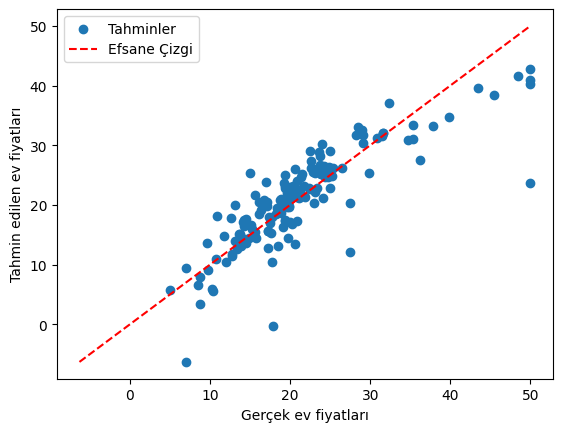

In [76]:
plot.scatter(y_test , y_pred , label ="Tahminler")
plot.xlabel("Gerçek ev fiyatları")
plot.ylabel("Tahmin edilen ev fiyatları")

min_val = min (y_test.min(), y_pred.min())
max_val = max (y_test.max(), y_pred.max()) 

plot.plot([min_val , max_val] , [min_val , max_val] , color="red" , linestyle="--" , label="Efsane Çizgi")
plot.legend()
plot.show()

In [79]:
coef_df = pd.DataFrame(model.coef_,X.columns, columns=["Katsayı"])
coef_df

# CRIM(-0.12) - olması demek -> CRIM arttıkça fiyat azalır (Ters orantı)
# RAD [0.19) + olması demek -> RAD arttıkça fiyat artar ( Doğru orantı)

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219


In [80]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04


In [81]:
import numpy as np 
new_house = np.array(
    [
        [0.09178, 0.0 , 11.083992 ,0.0,	0.51,	6.416,	68.518519,	2.6463,	5,	296,	16.6,	395.5,	9.04 ]
    ]
)
new_house
        

array([[9.1780000e-02, 0.0000000e+00, 1.1083992e+01, 0.0000000e+00,
        5.1000000e-01, 6.4160000e+00, 6.8518519e+01, 2.6463000e+00,
        5.0000000e+00, 2.9600000e+02, 1.6600000e+01, 3.9550000e+02,
        9.0400000e+00]])

In [83]:
feature_name = ["CRIM" , "ZN", "INDUS", "CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
new_house_df = pd.DataFrame(new_house, columns=feature_name)
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5.0,296.0,16.6,395.5,9.04


In [84]:
model.predict(new_house_df)

array([28.94684243])